In [56]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]'

In [57]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import metrics
from matplotlib import rcParams
import sklearn 
from sklearn import datasets


In [58]:
conda install -c plotly plotly=5.3.1 

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [59]:
players = pd.read_csv("D:\Download\Players.csv")
stats = pd.read_csv("D:\Download\Seasons_Stats.csv")
pdata = pd.read_csv("D:\Download\player_data.csv")



In [60]:
#check data formation
players.head()
stats.head()
pdata.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,0:00:00,1995,F-C,10月6日,240.0,24-Jun-68,Duke University
1,Zaid Abdul-Aziz,0:00:00,1978,C-F,9月6日,235.0,7-Apr-46,Iowa State University
2,Kareem Abdul-Jabbar,0:00:00,1989,C,2月7日,225.0,16-Apr-47,"University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,0:00:00,2001,G,1月6日,162.0,9-Mar-69,Louisiana State University
4,Tariq Abdul-Wahad,0:00:00,2003,F,6月6日,223.0,3-Nov-74,San Jose State University


In [61]:
#check data formation
print(players.shape)
print(stats.shape)
print(pdata.shape)
print(players.columns)
print(stats.columns)
print(pdata.columns)

(3922, 8)
(24691, 53)
(4550, 8)
Index(['Unnamed: 0', 'Player', 'height', 'weight', 'collage', 'born', 'birth_city', 'birth_state'], dtype='object')
Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS',
       'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')
Index(['name', 'year_start', 'year_end', 'position', 'height', 'weight', 'birth_date', 'college'], dtype='object')


In [62]:
#drop na value and transfer year col into intergal
#Clear table from year 1978 to 2018
abc=stats.dropna(how='all')
abc['Year'] = abc['Year'].astype(int,errors='ignore')
newstat= abc[abc['Year'] >= 1980]
newstat=newstat.rename(columns={ "G":"GamePlayed","GS":"GameStarted","MP":"MinsPlayed","Tm":"TeamPlayed","PER":"PlayerEfficient","Pos":"Position","3PAr":"3pAtteptRate","TRB%":"TotalRebound%","AST%":"Assist%","STL%":"Steal%","BLK%":"Block%","TOV%":"Turnover%",
                                "TRB":"TotalRebound","AST":"Assist","STL":"Steal","BLK":"Block","TOV":"Turnover","PTS":"Points",'FG':'FieldGoals','FGA':'FieldGoalAttempt',"FG%":"FieldGoal%","3P":"3PointFG","3PA":"3PAttempt","3P%":"3PFG%",
                               "2P":"2PointFG","2PA":"2PAttempt","2P%":"2PFG%","FT":"FreeThrow","FTA":"FTAttempt","FT%":"FreeThrow%"})
newstat=newstat.drop(columns=["Unnamed: 0","blanl","blank2","ORB%","DRB%","OWS","DWS","WS","WS/48","OBPM","DBPM","BPM","ORB","DRB","FTr","PF","TS%","USG%","eFG%","VORP"])

#number of records
#check if data type is right
newstat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18927 entries, 5727 to 24690
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              18927 non-null  float64
 1   Player            18927 non-null  object 
 2   Position          18927 non-null  object 
 3   Age               18927 non-null  float64
 4   TeamPlayed        18927 non-null  object 
 5   GamePlayed        18927 non-null  float64
 6   GameStarted       18233 non-null  float64
 7   MinsPlayed        18927 non-null  float64
 8   PlayerEfficient   18922 non-null  float64
 9   3pAtteptRate      18839 non-null  float64
 10  TotalRebound%     18922 non-null  float64
 11  Assist%           18922 non-null  float64
 12  Steal%            18922 non-null  float64
 13  Block%            18922 non-null  float64
 14  Turnover%         18866 non-null  float64
 15  FieldGoals        18927 non-null  float64
 16  FieldGoalAttempt  18927 non-null  flo

In [63]:
print(newstat.columns)

Index(['Year', 'Player', 'Position', 'Age', 'TeamPlayed', 'GamePlayed', 'GameStarted',
       'MinsPlayed', 'PlayerEfficient', '3pAtteptRate', 'TotalRebound%', 'Assist%', 'Steal%',
       'Block%', 'Turnover%', 'FieldGoals', 'FieldGoalAttempt', 'FieldGoal%', '3PointFG',
       '3PAttempt', '3PFG%', '2PointFG', '2PAttempt', '2PFG%', 'FreeThrow', 'FTAttempt',
       'FreeThrow%', 'TotalRebound', 'Assist', 'Steal', 'Block', 'Turnover', 'Points'],
      dtype='object')


In [64]:
#data Desciption
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)
newstat[['Player', 'Position', 'Age', 'TeamPlayed', 'GamePlayed', 'GameStarted',
       'MinsPlayed', 'PlayerEfficient', "Points"]].describe()

,Age,GamePlayed,GameStarted,MinsPlayed,PlayerEfficient,Points
count,18927.000000,18927.000000,18233.000000,18927.000000,18922.000000,18927.000000
mean,26.838326,49.639510,23.593375,1162.004649,12.395714,486.034184
std,3.999546,26.693379,28.632387,924.026516,6.200326,479.419028
min,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000
25%,24.000000,26.000000,0.000000,313.000000,9.700000,94.000000
50%,26.000000,55.000000,8.000000,985.000000,12.700000,338.000000
75%,30.000000,75.000000,45.000000,1894.000000,15.600000,750.000000
max,44.000000,85.000000,83.000000,3533.000000,129.100000,3041.000000


In [65]:
#data Desciption
newstat[['TotalRebound%', 'Assist%', 'Steal%',
       'Block%', 'Turnover%','TotalRebound', 'Assist', 'Steal', 'Block', 'Turnover']].describe()

,TotalRebound%,Assist%,Steal%,Block%,Turnover%,TotalRebound,Assist,Steal,Block,Turnover
count,18922.000000,18922.000000,18922.000000,18922.000000,18866.000000,18927.000000,18927.000000,18927.000000,18927.000000,18927.000000
mean,9.948827,13.098023,1.649894,1.451533,15.006228,203.935066,110.585513,38.771332,24.171818,72.570613
std,5.063935,9.569159,1.027371,1.821756,6.897439,202.431683,137.328298,37.829930,36.471577,66.602288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6.300000,1.100000,0.400000,11.300000,46.000000,17.000000,9.000000,3.000000,17.000000
50%,9.200000,10.400000,1.500000,0.900000,14.100000,145.000000,61.000000,28.000000,11.000000,54.000000
75%,13.400000,17.900000,2.100000,2.000000,17.600000,295.000000,151.000000,58.000000,29.000000,110.000000
max,100.000000,100.000000,24.200000,77.800000,100.000000,1530.000000,1164.000000,301.000000,456.000000,464.000000


In [66]:
#data Desciption
newstat[['FieldGoals', 'FieldGoalAttempt', 'FieldGoal%','FreeThrow', 'FTAttempt','FreeThrow%']].describe()

,FieldGoals,FieldGoalAttempt,FieldGoal%,FreeThrow,FTAttempt,FreeThrow%
count,18927.000000,18927.000000,18839.000000,18927.000000,18927.000000,18182.000000
mean,185.121361,401.153801,0.438255,93.576425,124.251334,0.721709
std,181.223343,378.474645,0.096844,107.290670,137.042516,0.147018
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,86.000000,0.401000,15.000000,23.000000,0.660000
50%,130.000000,291.000000,0.444000,55.000000,77.000000,0.750000
75%,286.000000,620.000000,0.487000,135.000000,181.000000,0.813000
max,1098.000000,2279.000000,1.000000,833.000000,972.000000,1.000000


In [67]:
#data Desciption
newstat[['3pAtteptRate', '3PointFG',
       '3PAttempt', '3PFG%', '2PointFG', '2PAttempt', '2PFG%']].describe()

,3pAtteptRate,3PointFG,3PAttempt,3PFG%,2PointFG,2PAttempt,2PFG%
count,18839.000000,18927.000000,18927.000000,15416.000000,18927.000000,18927.000000,18810.000000
mean,0.158604,22.215037,63.604480,0.248796,162.906324,337.549321,0.457184
std,0.187495,38.543366,102.442769,0.176683,167.763105,334.935966,0.100017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005000,0.000000,1.000000,0.100000,30.000000,69.000000,0.423000
50%,0.064000,2.000000,11.000000,0.292000,108.000000,232.000000,0.467000
75%,0.288000,27.000000,84.000000,0.363000,246.000000,507.500000,0.503000
max,1.000000,402.000000,886.000000,1.000000,1086.000000,2213.000000,1.000000


In [68]:
#Average Points Per Game
(newstat.Points.mean()) /(newstat.GamePlayed.mean())

9.791276887199622

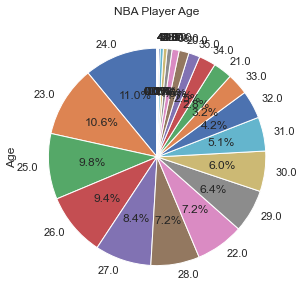

In [69]:
# Creating piechart figure 1a
count_age=newstat['Age'].value_counts()
age_unique = newstat["Age"].unique()

count_age.plot.pie(y='Age',figsize=(10,5),autopct='%1.1f%%', startangle=90)
plt.title("NBA Player Age")

plt.show()


<AxesSubplot:title={'center':'NBA Age Count'}>

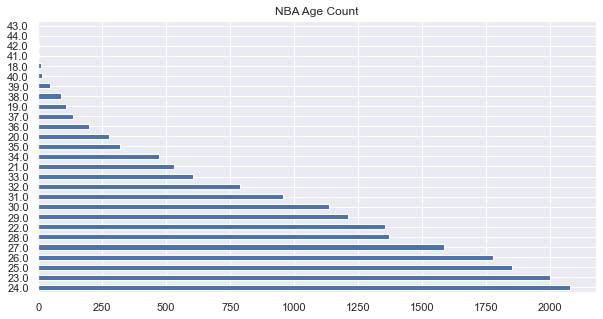

In [70]:
# Creating figure 1b
plt.title("NBA Age Count")
count_age.plot(kind='barh', figsize=(10,5))

Text(0.5, 1.0, 'Average Block By Age Group')

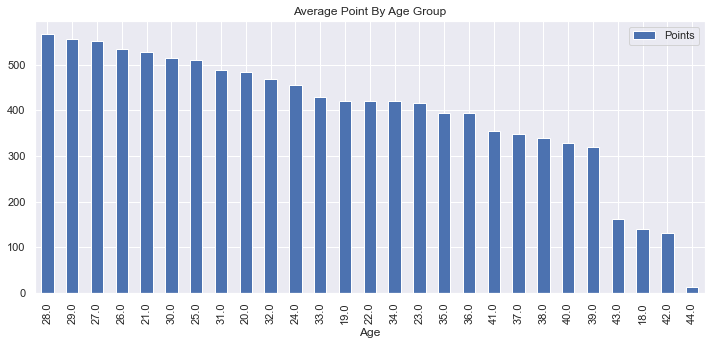

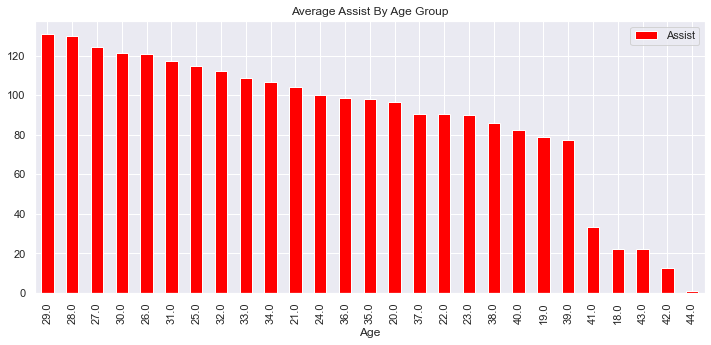

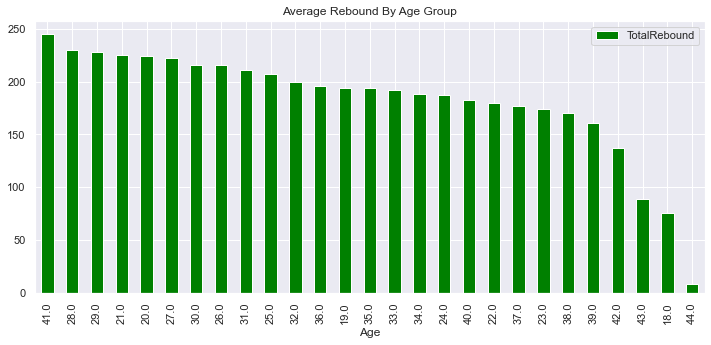

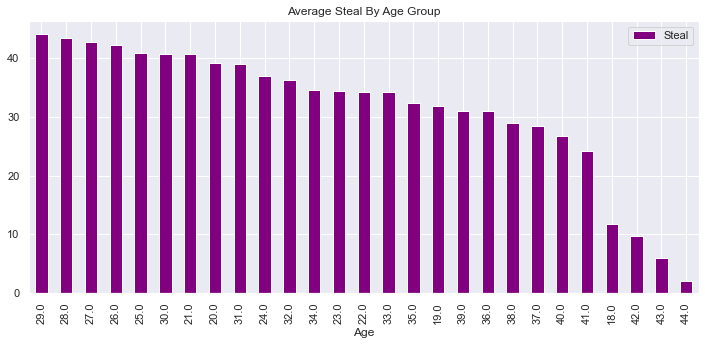

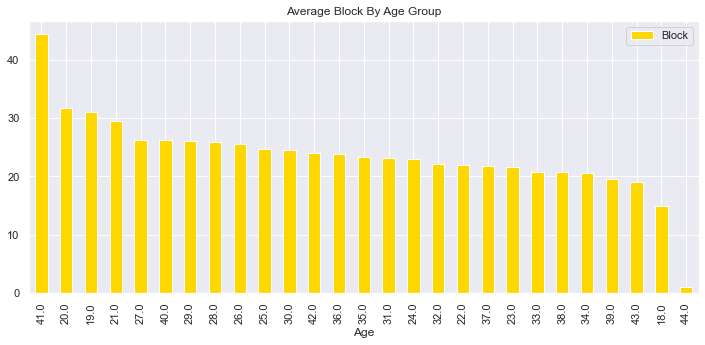

In [71]:
#creating figure 2a 2b 2c 2d 2e
ageavg = newstat[["Age","Points"]].groupby("Age").mean().sort_values("Points",ascending=False)
ax = ageavg.plot.bar(figsize=(12,5))
plt.title("Average Point By Age Group")

ageavgas = newstat[["Age","Assist"]].groupby("Age").mean().sort_values("Assist",ascending=False)
ax = ageavgas.plot.bar(figsize=(12,5),color="red")
plt.title("Average Assist By Age Group")

ageavgrb = newstat[["Age","TotalRebound"]].groupby("Age").mean().sort_values("TotalRebound",ascending=False)
ax = ageavgrb.plot.bar(figsize=(12,5),color="Green")
plt.title("Average Rebound By Age Group")

ageavgst = newstat[["Age","Steal"]].groupby("Age").mean().sort_values("Steal",ascending=False)
ax = ageavgst.plot.bar(figsize=(12,5),color="Purple")
plt.title("Average Steal By Age Group")

ageavgblk = newstat[["Age","Block"]].groupby("Age").mean().sort_values("Block",ascending=False)
ax = ageavgblk.plot.bar(figsize=(12,5),color="Gold")
plt.title("Average Block By Age Group")

In [72]:
#Who played in Age 41?
newstat[newstat["Age"] == 41]

,Year,Player,Position,Age,TeamPlayed,GamePlayed,GameStarted,MinsPlayed,PlayerEfficient,3pAtteptRate,TotalRebound%,Assist%,Steal%,Block%,Turnover%,FieldGoals,FieldGoalAttempt,FieldGoal%,3PointFG,3PAttempt,3PFG%,2PointFG,2PAttempt,2PFG%,FreeThrow,FTAttempt,FreeThrow%,TotalRebound,Assist,Steal,Block,Turnover,Points
9108,1989.0,Kareem Abdul-Jabbar*,C,41.0,LAL,74.0,74.0,1695.0,12.9,0.005,11.0,6.1,1.1,2.9,11.5,313.0,659.0,0.475,0.0,3.0,0.0,313.0,656.0,0.477,122.0,165.0,0.739,334.0,74.0,38.0,85.0,95.0,748.0
12144,1995.0,Robert Parish*,C,41.0,CHH,81.0,4.0,1352.0,10.1,0.000,15.3,5.0,1.1,1.9,13.7,159.0,372.0,0.427,0.0,0.0,NaN,159.0,372.0,0.427,71.0,101.0,0.703,350.0,44.0,27.0,36.0,66.0,389.0
17067,2004.0,Kevin Willis,C,41.0,SAS,48.0,0.0,373.0,14.9,0.007,14.7,5.5,3.0,1.8,16.1,70.0,150.0,0.467,0.0,1.0,0.0,70.0,149.0,0.470,24.0,39.0,0.615,98.0,11.0,21.0,9.0,32.0,164.0
19125,2008.0,Dikembe Mutombo*,C,41.0,HOU,39.0,25.0,619.0,14.5,0.000,18.1,1.2,0.9,5.7,14.6,43.0,80.0,0.538,0.0,0.0,NaN,43.0,80.0,0.538,32.0,45.0,0.711,199.0,5.0,11.0,48.0,17.0,118.0


In [73]:
#How many player played in NBA since 1980
newstat.groupby("Player").Player.nunique()

Player
A.C. Green            1
A.J. Bramlett         1
A.J. English          1
A.J. Guyton           1
A.J. Hammons          1
                     ..
Zeljko Rebraca        1
Zendon Hamilton       1
Zoran Dragic          1
Zoran Planinic        1
Zydrunas Ilgauskas    1
Name: Player, Length: 2835, dtype: int64

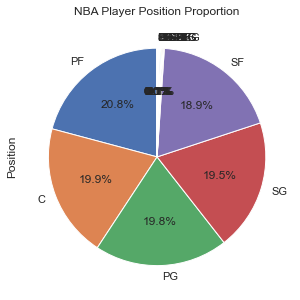

PF       3945
C        3765
PG       3753
SG       3691
SF       3572
PG-SG      28
SF-SG      27
C-PF       26
SG-SF      25
SG-PG      25
PF-C       23
PF-SF      22
SF-PF      20
SG-PF       3
PG-SF       1
C-SF        1
Name: Position, dtype: int64

In [162]:
#figure 3
sea.set(rc={'figure.figsize':(7,5)})
pp = newstat["Position"].value_counts()
pp.plot.pie(y="Position",autopct='%1.1f%%', startangle=90)
plt.title("NBA Player Position Proportion")

plt.show()

newstat["Position"].value_counts()

In [75]:
#playerpos = newstat[["Player","Position"]].groupby("Position").count().sort_values("Player",ascending=False)
#ax = playerpos.plot.bar(figsize=(10,3))
#plt.title("Player Position Count")

In [76]:
#new origin stat Combined_Advantages_For_Team
newstatv2 = newstat
Combined_Advantages_Actions_For_Team = newstat["FieldGoals"]+newstat["Assist"]+newstat["TotalRebound"]+newstat["Steal"]+newstat["Block"]
newstatv2["Combined_Advantages"] = Combined_Advantages_Actions_For_Team

Position
SG    752002.0
SF    735886.0
PF    719974.0
PG    662559.0
C     602017.0
Name: FieldGoals, dtype: float64
Position
PG    829003.0
SG    442366.0
SF    337224.0
PF    266482.0
C     199133.0
Name: Assist, dtype: float64
Position
PF    1089488.0
C     1066571.0
SF     721197.0
SG     509260.0
PG     440006.0
Name: TotalRebound, dtype: float64
Position
PG    190866.0
SG    164511.0
SF    148346.0
PF    127911.0
C      95185.0
Name: Steal, dtype: float64
Position
C     188653.0
PF    122132.0
SF     72354.0
SG     44295.0
PG     26560.0
Name: Block, dtype: float64
Position
PF    2325987.0
C     2151559.0
PG    2148994.0
SF    2015007.0
SG    1912434.0
Name: Combined_Advantages, dtype: float64


Text(0.5, 1.0, 'Position Combined Advantages Distribution')

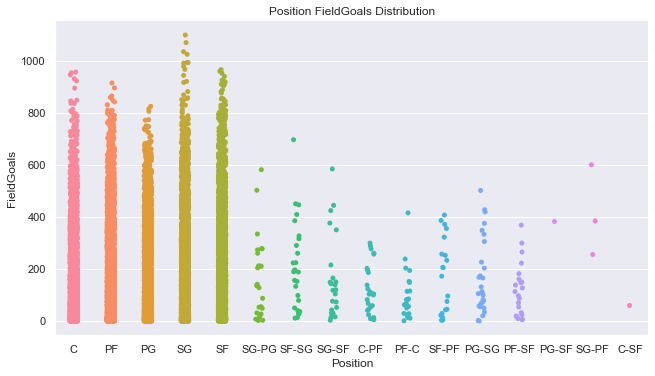

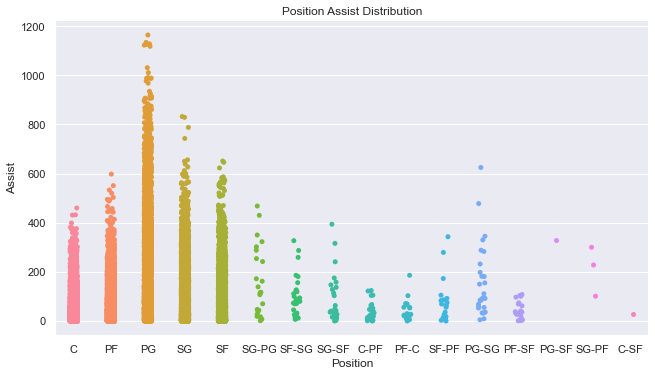

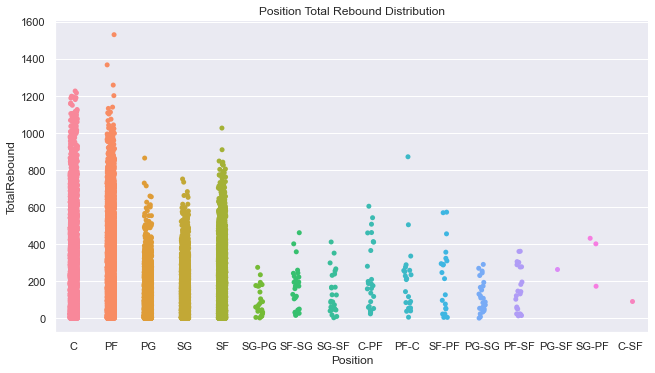

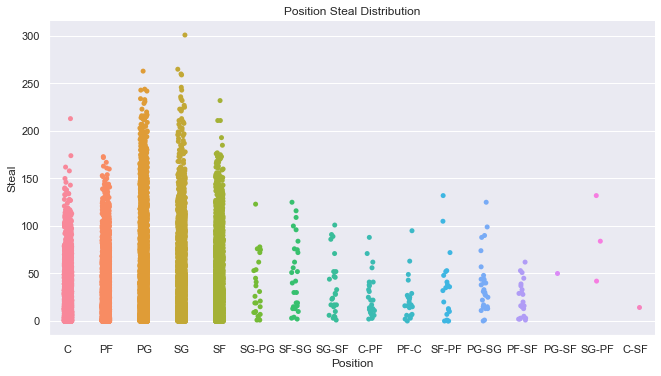

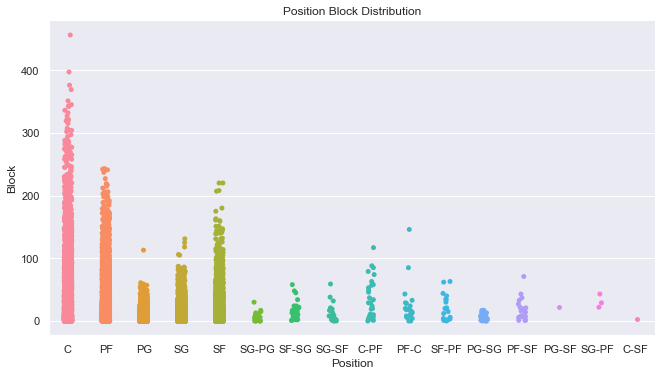

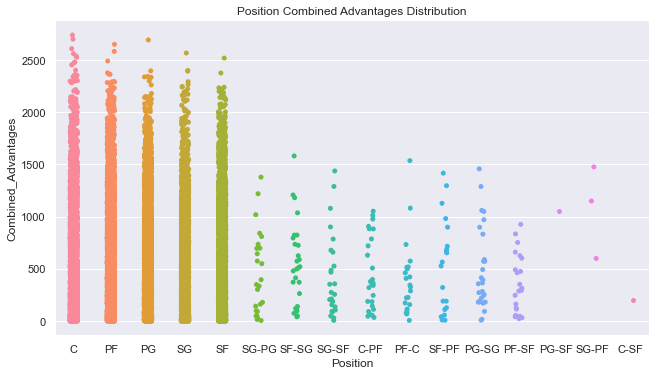

In [77]:
#figure 4
#What Different Position Incharged?
position_grouping = newstatv2.groupby("Position")
print(position_grouping.sum()["FieldGoals"].sort_values(ascending=False).head())
print(position_grouping.sum()["Assist"].sort_values(ascending=False).head())
print(position_grouping.sum()["TotalRebound"].sort_values(ascending=False).head())
print(position_grouping.sum()["Steal"].sort_values(ascending=False).head())
print(position_grouping.sum()["Block"].sort_values(ascending=False).head())
print(position_grouping.sum()["Combined_Advantages"].sort_values(ascending=False).head())

sea.catplot(x='Position', y='FieldGoals', data=newstatv2)
plt.gcf().set_size_inches(10, 5)
plt.title("Position FieldGoals Distribution")

sea.catplot(x='Position', y='Assist', data=newstatv2)
plt.gcf().set_size_inches(10, 5)
plt.title("Position Assist Distribution")

sea.catplot(x='Position', y='TotalRebound', data=newstatv2)
plt.gcf().set_size_inches(10, 5)
plt.title("Position Total Rebound Distribution")

sea.catplot(x='Position', y='Steal', data=newstatv2)
plt.gcf().set_size_inches(10, 5)
plt.title("Position Steal Distribution")

sea.catplot(x='Position', y='Block', data=newstatv2)
plt.gcf().set_size_inches(10, 5)
plt.title("Position Block Distribution")

sea.catplot(x='Position', y='Combined_Advantages', data=newstatv2)
plt.gcf().set_size_inches(10, 5)
plt.title("Position Combined Advantages Distribution")

Text(0.5, 1.0, 'Data Distribution of Player')

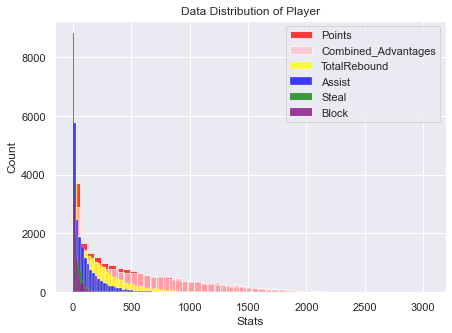

In [78]:
#Player Distribution
plt.xlabel("Stats")
sea.set(rc={'figure.figsize':(11,10)})
sea.histplot(newstatv2['Points'], bins=50, color="Red",).legend(labels=['Points','Combined_Advantages','TotalRebound','Assist','Steal','Block']) 

sea.set(rc={'figure.figsize':(11,10)})
sea.histplot(newstatv2['Combined_Advantages'], bins=50,color="Pink").legend(labels=['Points','Combined_Advantages','TotalRebound','Assist','Steal','Block'])

sea.set(rc={'figure.figsize':(11,10)})
sea.histplot(newstatv2['TotalRebound'], bins=50,color="Yellow").legend(labels=['Points','Combined_Advantages','TotalRebound','Assist','Steal','Block'])

sea.set(rc={'figure.figsize':(11,10)})
sea.histplot(newstatv2['Assist'], bins=50, color="Blue").legend(labels=['Points','Combined_Advantages','TotalRebound','Assist','Steal','Block'])

sea.set(rc={'figure.figsize':(11,10)})
sea.histplot(newstatv2['Steal'], bins=50,color="Green").legend(labels=['Points','Combined_Advantages','TotalRebound','Assist','Steal','Block'])

sea.set(rc={'figure.figsize':(11,10)})
sea.histplot(newstatv2['Block'], bins=50, color="Purple").legend(labels=['Points','Combined_Advantages','TotalRebound','Assist','Steal','Block'])
plt.title("Data Distribution of Player")



In [79]:
#join with height and Weight first
newstatv3 = pd.merge(newstatv2,players,on='Player',how='left')


<AxesSubplot:>

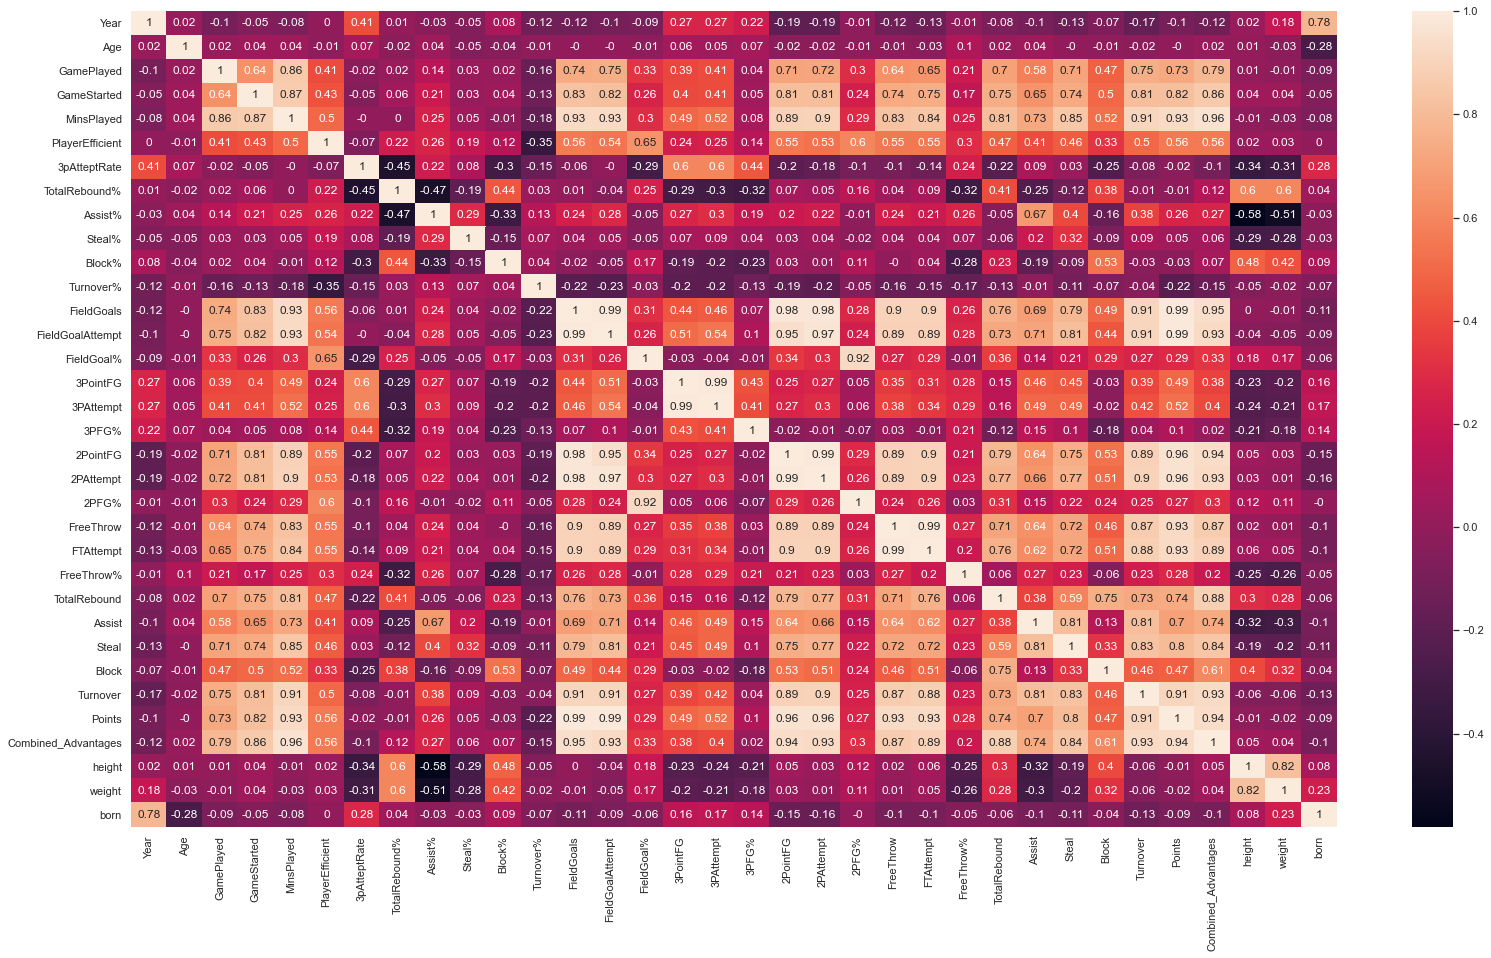

In [163]:
#Heatmap to see corealation, drop 
heatmapdata = newstatv3.drop(columns=["Unnamed: 0"])
plt.gcf().set_size_inches(27, 15)
sea.heatmap(np.round(heatmapdata.corr(),2),annot=True)

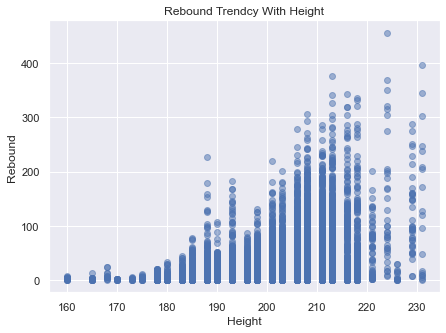

In [170]:
#Rebound againt Height
plt.scatter(heatmapdata["height"], heatmapdata["Block"],alpha=0.5)
plt.title('Rebound Trendcy With Height')
plt.xlabel('Height')
plt.ylabel('Rebound')
plt.show()

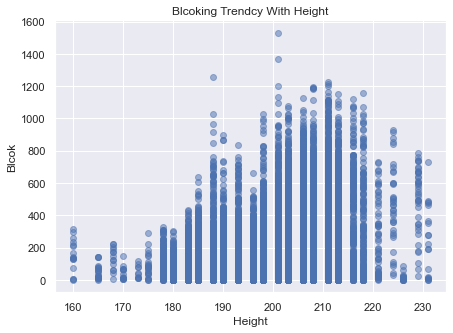

In [171]:
#Block againt Height
plt.scatter(heatmapdata["height"], heatmapdata["TotalRebound"],alpha=0.5)
plt.title('Blcoking Trendcy With Height')
plt.xlabel('Height')
plt.ylabel('Blcok')
plt.show()

seems the more weight and height you will more probaly to secure a rebound and also more likely to make blolck
the more game you play more likely you will get more points

In [81]:
#Best Player Ever By Season
print(newstatv2[["Year","Player","Age","Position","Points"]].sort_values("Points",ascending=False).head(5), "\n")
print(newstatv2[["Year","Player","Age","Position","Assist"]].sort_values("Assist",ascending=False).head(5))
print(newstatv2[["Year","Player","Age","Position","TotalRebound"]].sort_values("TotalRebound",ascending=False).head(5), "\n")
print(newstatv2[["Year","Player","Age","Position","Steal"]].sort_values("Steal",ascending=False).head(5), "\n")
print(newstatv2[["Year","Player","Age","Position","Block"]].sort_values("Block",ascending=False).head(5), "\n")
print(newstatv2[["Year","Player","Age","Position","Combined_Advantages"]].sort_values("Combined_Advantages",ascending=False).head(5), "\n")

         Year           Player   Age Position  Points
8469   1987.0  Michael Jordan*  23.0       SG  3041.0
8869   1988.0  Michael Jordan*  24.0       SG  2868.0
17742  2006.0      Kobe Bryant  27.0       SG  2832.0
9747   1990.0  Michael Jordan*  26.0       SG  2753.0
9297   1989.0  Michael Jordan*  25.0       SG  2633.0 

         Year          Player   Age Position  Assist
10377  1991.0  John Stockton*  28.0       PG  1164.0
9923   1990.0  John Stockton*  27.0       PG  1134.0
9018   1988.0  John Stockton*  25.0       PG  1128.0
10844  1992.0  John Stockton*  29.0       PG  1126.0
7857   1985.0   Isiah Thomas*  23.0       PG  1123.0
         Year          Player   Age Position  TotalRebound
10801  1992.0  Dennis Rodman*  30.0       PF        1530.0
11737  1994.0  Dennis Rodman*  32.0       PF        1367.0
10895  1992.0    Kevin Willis  29.0       PF        1258.0
23180  2015.0  DeAndre Jordan  26.0        C        1226.0
5973   1980.0      Swen Nater  30.0        C        1216.0 



In [82]:
#Best Player By Whole Career
player_grouping = newstatv2.groupby("Player")
print("Best Player By Total:Points","\n",player_grouping.sum()["Points"].sort_values(ascending=False).head(5), "\n")
print("Best Player By Total:Assist","\n",player_grouping.sum()["Assist"].sort_values(ascending=False).head(5), "\n")
print("Best Player By Total:Rebound","\n",player_grouping.sum()["TotalRebound"].sort_values(ascending=False).head(5),"\n")
print("Best Player By Total:Steal","\n",player_grouping.sum()["Steal"].sort_values(ascending=False).head(5),"\n")
print("Best Player By Total:Block","\n",player_grouping.sum()["Block"].sort_values(ascending=False).head(5),"\n")
print("Best Player By Total:Combined_Advantages","\n",player_grouping.sum()["Combined_Advantages"].sort_values(ascending=False).head(5),"\n")

Best Player By Total:Points 
 Player
Karl Malone*       36928.0
Kobe Bryant        33643.0
Michael Jordan*    32292.0
Dirk Nowitzki      30260.0
Eddie Johnson      29779.0
Name: Points, dtype: float64 

Best Player By Total:Assist 
 Player
John Stockton*    15806.0
Jason Kidd        13393.0
Mark Jackson      11930.0
Steve Nash        10335.0
Magic Johnson*    10141.0
Name: Assist, dtype: float64 

Best Player By Total:Rebound 
 Player
Tim Duncan          15091.0
Kevin Garnett       14973.0
Karl Malone*        14968.0
Kevin Willis        13803.0
Hakeem Olajuwon*    13748.0
Name: TotalRebound, dtype: float64 

Best Player By Total:Steal 
 Player
John Stockton*     3265.0
Jason Kidd         2944.0
Gary Payton*       2578.0
Michael Jordan*    2514.0
Clyde Drexler*     2343.0
Name: Steal, dtype: float64 

Best Player By Total:Block 
 Player
Hakeem Olajuwon*    3830.0
Dikembe Mutombo*    3492.0
Mark Eaton          3064.0
Tim Duncan          3020.0
David Robinson*     2954.0
Name: Block, dtyp

In [83]:
#Best Player By On Average 
print("Best Player By On Average:Points","\n",player_grouping.mean()["Points"].sort_values(ascending=False).head(5),"\n")
print("Best Player By On Average:Assist","\n",player_grouping.mean()["Assist"].sort_values(ascending=False).head(5),"\n")
print("Best Player By On Average:Rebound","\n",player_grouping.mean()["TotalRebound"].sort_values(ascending=False).head(5),"\n")
print("Best Player By On Average:Steal","\n",player_grouping.mean()["Steal"].sort_values(ascending=False).head(5),"\n")
print("Best Player By On Average:Block","\n",player_grouping.mean()["Block"].sort_values(ascending=False).head(5),"\n")
print("Best Player By On Average:Combined_Advantages","\n",player_grouping.mean()["Combined_Advantages"].sort_values(ascending=False).head(5),"\n")


Best Player By On Average:Points 
 Player
Michael Jordan*    2152.800000
LeBron James       2056.214286
George Gervin*     2030.857143
Karl Malone*       1943.578947
Kevin Durant       1912.100000
Name: Points, dtype: float64 

Best Player By On Average:Assist 
 Player
John Stockton*    831.894737
Magic Johnson*    780.076923
Isiah Thomas*     697.000000
Chris Paul        687.583333
John Wall         658.571429
Name: Assist, dtype: float64 

Best Player By On Average:Rebound 
 Player
Andre Drummond        989.200000
Karl-Anthony Towns    932.500000
Dwight Howard         929.923077
Wes Unseld*           883.500000
Dennis Rodman*        853.857143
Name: TotalRebound, dtype: float64 

Best Player By On Average:Steal 
 Player
Alvin Robertson    188.916667
John Stockton*     171.842105
Micheal Ray        171.666667
Michael Jordan*    167.600000
Mookie Blaylock    159.615385
Name: Steal, dtype: float64 

Best Player By On Average:Block 
 Player
Mark Eaton          278.545455
Hakeem Olajuwon*

In [84]:
#Hierarchical Clustering
#want to see how many types of player are there in NBA
#drop non-competiton statistic and percentage
newstatv4=newstatv3 .drop(columns=["collage","Unnamed: 0","born","birth_city","birth_state","Age","TeamPlayed","GamePlayed", "GameStarted","MinsPlayed"]).dropna()
#seperate the positions and statisitic
unsp_stats= newstatv4.values[:, 5:32]
unsp_position = newstatv4.values[:,2]

from sklearn.preprocessing import scale
scaled_data = scale(unsp_stats)

from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram,linkage



In [85]:
#check the data
newstatv4

,Year,Player,Position,PlayerEfficient,3pAtteptRate,TotalRebound%,Assist%,Steal%,Block%,Turnover%,FieldGoals,FieldGoalAttempt,FieldGoal%,3PointFG,3PAttempt,3PFG%,2PointFG,2PAttempt,2PFG%,FreeThrow,FTAttempt,FreeThrow%,TotalRebound,Assist,Steal,Block,Turnover,Points,Combined_Advantages,height,weight
0,1980.0,Kareem Abdul-Jabbar*,C,25.3,0.001,15.4,16.5,1.2,4.6,15.7,835.0,1383.0,0.604,0.0,1.0,0.000,835.0,1382.0,0.604,364.0,476.0,0.765,886.0,371.0,81.0,280.0,297.0,2034.0,2453.0,218.0,102.0
1,1980.0,Tom Abernethy,PF,11.0,0.003,8.6,9.3,1.4,0.6,9.9,153.0,318.0,0.481,0.0,1.0,0.000,153.0,317.0,0.483,56.0,82.0,0.683,191.0,87.0,35.0,12.0,39.0,362.0,478.0,201.0,99.0
2,1980.0,Alvan Adams,C,19.2,0.002,15.4,21.6,2.3,1.4,18.2,465.0,875.0,0.531,0.0,2.0,0.000,465.0,873.0,0.533,188.0,236.0,0.797,609.0,322.0,108.0,55.0,218.0,1118.0,1559.0,206.0,95.0
3,1980.0,Tiny Archibald*,PG,15.3,0.023,3.8,30.2,1.7,0.2,19.7,383.0,794.0,0.482,4.0,18.0,0.222,379.0,776.0,0.488,361.0,435.0,0.830,197.0,671.0,106.0,10.0,242.0,1131.0,1367.0,185.0,68.0
5,1980.0,Gus Bailey,SG,9.3,0.029,7.8,17.8,1.8,1.2,21.3,16.0,35.0,0.457,1.0,1.0,1.000,15.0,34.0,0.441,5.0,13.0,0.385,28.0,26.0,7.0,4.0,11.0,38.0,81.0,196.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18921,2017.0,Thaddeus Young,PF,14.9,0.172,11.3,8.4,2.6,1.2,11.7,362.0,687.0,0.527,45.0,118.0,0.381,317.0,569.0,0.557,45.0,86.0,0.523,449.0,122.0,114.0,30.0,96.0,814.0,1077.0,203.0,100.0
18922,2017.0,Cody Zeller,PF,16.7,0.002,12.9,9.1,1.8,3.0,10.9,253.0,443.0,0.571,0.0,1.0,0.000,253.0,442.0,0.572,133.0,196.0,0.679,405.0,99.0,62.0,58.0,65.0,639.0,877.0,213.0,108.0
18923,2017.0,Tyler Zeller,C,13.0,0.006,13.2,12.2,0.7,3.3,10.2,78.0,158.0,0.494,0.0,1.0,0.000,78.0,157.0,0.497,22.0,39.0,0.564,124.0,42.0,7.0,21.0,20.0,178.0,272.0,213.0,114.0
18925,2017.0,Paul Zipser,SF,6.9,0.448,8.0,6.1,0.9,1.5,14.4,88.0,221.0,0.398,33.0,99.0,0.333,55.0,122.0,0.451,31.0,40.0,0.775,125.0,36.0,15.0,16.0,40.0,240.0,280.0,203.0,97.0


In [45]:
#dendrogram as we want to send player to different types of player, we use ward linkage
model = linkage(scaled_data, "ward")
plt.figure(figsize=((10,7)))
plt.title("dendrogram")
plt.xlabel("sample index") 
plt.ylabel("distance")
dendrogram(model)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000265C90B9B80> (for post_execute):


KeyboardInterrupt: 

In [86]:
#Set model and test
from sklearn.preprocessing import LabelEncoder
n_samples, n_features = scaled_data.shape  
n_digits = len(np.unique(unsp_position)) 
unsp_position2 = LabelEncoder().fit_transform(unsp_position) 
model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage="average", 
affinity="cosine") 
model.fit(scaled_data) 
print(unsp_position2) 
print(model.labels_) 
print("silhouette",metrics.silhouette_score(scaled_data, model.labels_))  
print("completeness",metrics.completeness_score(unsp_position2, model.labels_))  
print("homogeneity",metrics.homogeneity_score(unsp_position2, model.labels_))

[0 3 0 ... 0 9 0]
[10  2 10 ...  2  3 10]


KeyboardInterrupt: 

In [ ]:
#Try five Cluster
from sklearn import cluster 
from sklearn.preprocessing import LabelEncoder 
n_samples, n_features = scaled_data.shape  
n_digits = len(np.unique(unsp_position)) 
unsp_position2 = LabelEncoder().fit_transform(unsp_position) 
aff = ["euclidean", "manhattan", "cosine"]  
link = ["ward", "complete", "average"]  
for a in aff: 
    for l in link: 
        if(l=="ward" and a!="euclidean"): 
           continue 
        else: 
            print(a,l) 
            model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage=l, affinity=a)  
            model.fit(scaled_data) 
            print("silhouette",metrics.silhouette_score(scaled_data, model.labels_))  
            print("completeness",metrics.completeness_score(unsp_position2, model.labels_))  
            print("homogeneity",metrics.homogeneity_score(unsp_position2, model.labels_))

In [ ]:
#eulidean
#ward
#silhouette 0.059018821752816364
#completeness 0.19523932688152562
#homogeneity 0.3016618757171501

#complete
#silhouette 0.09229064254422513
#completeness 0.15775953066059714
#homogeneity 0.13859762840016865

#average
#silhouette 0.18634255993326085
#completeness 0.11867520892166282
#homogeneity 0.013381117657448606

eulid = {"linkage": ["ward", "complete","average"], "silhouette": [0.059018821752816364, 0.09229064254422513, 0.18634255993326085],
        "completeness": [0.19523932688152562, 0.15775953066059714,0.11867520892166282],"homogeneity": [0.3016618757171501, 0.13859762840016865, 0.013381117657448606]}
eulid = pd.DataFrame(data=eulid)

#manhattan
#complete
#silhouette 0.0537771782808197
#completeness 0.19414591025207303
#homogeneity 0.2519135257903703

#average
#silhouette 0.1768042133085481
#completeness 0.17451632355440455
#homogeneity 0.11168139151363062

manhattan = {"linkage": ["complete","average"], "silhouette": [0.0537771782808197, 0.1768042133085481],
        "completeness": [0.19414591025207303,0.17451632355440455],"homogeneity": [0.2519135257903703, 0.11168139151363062]}
manhattan  = pd.DataFrame(data=manhattan)

#cosine
#complete
#silhouette -0.018301727549702655
#completeness 0.14393241647211463
#homogeneity 0.224747161035206

#average
#silhouette -0.09537770957774176
#completeness 0.21550006612728625
#homogeneity 0.21243057323171796

cosine = {"linkage": ["complete","average"], "silhouette": [-0.018301727549702655, -0.09537770957774176],
        "completeness": [0.14393241647211463,0.224747161035206],"homogeneity": [0.21550006612728625, 0.21243057323171796]}
cosine  = pd.DataFrame(data=cosine)


In [ ]:
#Compare Score with different 5 Cluster
sea.set(rc={'figure.figsize':(5,5)})

bar_width = 0.35
eulid.plot.bar(rot=0, x='linkage',title = "Eulidean")
plt.tight_layout()
plt.ylim([-0.15,0.3])
plt.show()

sea.set(rc={'figure.figsize':(5,5)})
bar_width = 0.35
manhattan.plot.bar(rot=0, x='linkage',title = "Manhattan")
plt.tight_layout()
plt.ylim([-0.15,0.3])
plt.show()

sea.set(rc={'figure.figsize':(5,5)})
bar_width = 0.35
cosine.plot.bar(rot=0, x='linkage',title = "Cosine")
plt.tight_layout()
plt.ylim([-0.15,0.3])
plt.show()

In [ ]:
#At least we want to define 5 type of players, but how many can we do the kmean until its not usful?
from sklearn import cluster 
from sklearn.preprocessing import LabelEncoder 
n_samples, n_features = scaled_data.shape  
n_digits = len(np.unique(unsp_position2)) 
unsp_position2 = LabelEncoder().fit_transform(unsp_position) 

print("silhouette")
for x in range (5,21):
    kmeans = cluster.KMeans(n_clusters=x) 
    kmeans.fit(scaled_data) 
    print(metrics.silhouette_score(scaled_data, kmeans.labels_)) 

print("completeness")
for x in range (5,21):
    kmeans = cluster.KMeans(n_clusters=x) 
    kmeans.fit(scaled_data) 
    print(metrics.completeness_score(unsp_position2, kmeans.labels_)) 

print("homogeneity")
for x in range (5,21):
    kmeans = cluster.KMeans(n_clusters=x) 
    kmeans.fit(scaled_data) 
    print(metrics.homogeneity_score(unsp_position2, kmeans.labels_)) 

In [ ]:
kmeanresult = {"Cluster": [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], "silhouette": [0.17054792702552443,
0.15116825216396096,
0.14491798692621427,
0.1461038308197262,
0.13484338673890187,
0.13444921158527962,
0.1317294889098985,
0.12899152621363139,
0.12565203022488244,
0.12590448698727852,
0.11565679188024927,
0.11466534012400907,
0.112433405389869,
0.11020883583526374,
0.10805101887019108,
0.11187725804325639],
        "completeness": [0.24418814132257627,
0.25169464557998233,
0.2389915368389975,
0.2294814653733242,
0.22004025743313457,
0.217053418153805,
0.2162978595754502,
0.2021897978466292,
0.20132048371024833,
0.19855482311295336,
0.20397048600379858,
0.2004458541746631,
0.2009118677879397,
0.2026724385186572,
0.19745735472750123,
0.1913723653140055],"homogeneity": [0.22580167548753433,
0.2651064465659064,
0.2708830408522201,
0.27612145629186347,
0.27769545715479566,
0.2896495553400171,
0.29117350404048226,
0.2934261703437701,
0.298555461622386,
0.3047241198764037,
0.3209971071257122,
0.3212923163415307,
0.32076031376105696,
0.3340081628078754,
0.3439783037450284,
0.3381160191731975]}
kmeanresult = pd.DataFrame(data=kmeanresult)


sea.set(rc={'figure.figsize':(7,7)})
bar_width = 0.2
kmeanresult.plot.bar(rot=0, x='Cluster',title = "Kmean")
plt.tight_layout()
plt.ylim([0,0.4])
plt.show()

In [122]:
#Outliner in position not needed 
newstatv5=newstatv3 .drop(columns=["Year","collage","Unnamed: 0","born","birth_city","birth_state","TeamPlayed","Player","Combined_Advantages"]).dropna()
POSIT = ["PG","SG","PF","SF","C"] 
newstatv5=newstatv5[newstatv5.Position.isin(POSIT)]

In [123]:
#can i train a model to tell player Position? Maybe this could be an indictator for coach to tell which position to put the player in when its different stage of player's career
newstatv5["Position"]=LabelEncoder().fit_transform(newstatv5["Position"]) 
stat_outcome = newstatv5.values[:,0]
stat_att = newstatv5.values[:,2:33]

from sklearn import model_selection 
stat_att_train, stat_att_test, stat_outcome_train, stat_outcome_test = model_selection.train_test_split(stat_att, stat_outcome, test_size = 0.30)

In [161]:
#counting label
newstatv5["Position"].value_counts()

2    3374
4    3308
3    3050
1    2779
0    1904
Name: Position, dtype: int64

In [124]:
print("LOGISTIC REGRESSION") 
print("**************************************") 
from sklearn.linear_model import LogisticRegression 
lm = LogisticRegression() 
lm.fit(stat_att_train, stat_outcome_train) 
lm.predict_proba(stat_att_test) 
predicted = lm.predict(stat_att_test) 
print(metrics.classification_report(stat_outcome_test, predicted)) 
print(metrics.confusion_matrix(stat_outcome_test, predicted)) 

print("\n\nDecision Tree") 
print("**************************************") 
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier() 
model.fit(stat_att_train, stat_outcome_train) 
print(model) 
predicted = model.predict(stat_att_test) 
print(metrics.classification_report(stat_outcome_test, predicted)) 
print(metrics.confusion_matrix(stat_outcome_test, predicted)) 
 
print("\n\n KNeighbors") 
print("**************************************") 
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier() 
model.fit(stat_att_train, stat_outcome_train) 
print(model) 
predicted = model.predict(stat_att_test) 
print(metrics.classification_report(stat_outcome_test, predicted)) 
print(metrics.confusion_matrix(stat_outcome_test, predicted)) 
 
print("\n\n Naive Bayes") 
print("**************************************") 
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 
model.fit(stat_att_train, stat_outcome_train) 
print(model) 
predicted = model.predict(stat_att_test) 
print(metrics.classification_report(stat_outcome_test, predicted)) 
print(metrics.confusion_matrix(stat_outcome_test, predicted)) 

LOGISTIC REGRESSION
**************************************


C:\Users\Hello\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.67      0.45      0.54       574
         1.0       0.57      0.60      0.59       849
         2.0       0.80      0.87      0.84      1036
         3.0       0.57      0.47      0.52       921
         4.0       0.54      0.66      0.59       945

    accuracy                           0.63      4325
   macro avg       0.63      0.61      0.61      4325
weighted avg       0.63      0.63      0.63      4325

[[257 252   0  39  26]
 [112 513   9 157  58]
 [  0   0 903   1 132]
 [ 14 127  25 434 321]
 [  0   8 186 129 622]]


Decision Tree
**************************************
DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66       574
         1.0       0.61      0.62      0.61       849
         2.0       0.81      0.80      0.81      1036
         3.0       0.60      0.60      0.60       921
         4.0       0.60      0.60      0.60 

In [125]:
#try increase test sample to give better result
stat_outcome = newstatv5.values[:,0]
stat_att = newstatv5.values[:,2:33]

from sklearn import model_selection 
stat_att_train, stat_att_test, stat_outcome_train, stat_outcome_test = model_selection.train_test_split(stat_att, stat_outcome, test_size = 0.40)

In [126]:
print("\n\nDecision Tree") 
print("**************************************") 
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier() 
model.fit(stat_att_train, stat_outcome_train) 
print(model) 
predicted = model.predict(stat_att_test) 
print(metrics.classification_report(stat_outcome_test, predicted)) 
print(metrics.confusion_matrix(stat_outcome_test, predicted)) 
 



Decision Tree
**************************************
DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.71      0.66      0.68       775
         1.0       0.62      0.64      0.63      1113
         2.0       0.79      0.81      0.80      1334
         3.0       0.60      0.59      0.60      1228
         4.0       0.60      0.60      0.60      1316

    accuracy                           0.66      5766
   macro avg       0.66      0.66      0.66      5766
weighted avg       0.66      0.66      0.66      5766

[[ 508  225    1   37    4]
 [ 190  716    7  173   27]
 [   1    7 1086   23  217]
 [  18  173   35  727  275]
 [   2   28  244  249  793]]


In [127]:
#try increase test sample to give better result
stat_outcome = newstatv5.values[:,0]
stat_att = newstatv5.values[:,2:33]

from sklearn import model_selection 
stat_att_train, stat_att_test, stat_outcome_train, stat_outcome_test = model_selection.train_test_split(stat_att, stat_outcome, test_size = 0.50)

In [121]:
print("\n\nDecision Tree") 
print("**************************************") 
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier() 
model.fit(stat_att_train, stat_outcome_train) 
print(model) 
predicted = model.predict(stat_att_test) 
print(metrics.classification_report(stat_outcome_test, predicted)) 
print(metrics.confusion_matrix(stat_outcome_test, predicted)) 



Decision Tree
**************************************
DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67       928
         1.0       0.60      0.63      0.62      1333
         2.0       0.81      0.79      0.80      1757
         3.0       0.57      0.57      0.57      1507
         4.0       0.59      0.59      0.59      1683

    accuracy                           0.65      7208
   macro avg       0.65      0.65      0.65      7208
weighted avg       0.65      0.65      0.65      7208

[[ 618  265    0   38    7]
 [ 264  835    7  194   33]
 [   1    7 1386   37  326]
 [  27  247   41  859  333]
 [   7   28  276  385  987]]


In [128]:
#try increase test sample to give better result
stat_outcome = newstatv5.values[:,0]
stat_att = newstatv5.values[:,2:33]

from sklearn import model_selection 
stat_att_train, stat_att_test, stat_outcome_train, stat_outcome_test = model_selection.train_test_split(stat_att, stat_outcome, test_size = 0.60)

In [129]:
print("\n\nDecision Tree") 
print("**************************************") 
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier() 
model.fit(stat_att_train, stat_outcome_train) 
print(model) 
predicted = model.predict(stat_att_test) 
print(metrics.classification_report(stat_outcome_test, predicted)) 
print(metrics.confusion_matrix(stat_outcome_test, predicted)) 



Decision Tree
**************************************
DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.66      0.67      0.66      1128
         1.0       0.62      0.60      0.61      1753
         2.0       0.80      0.79      0.79      2016
         3.0       0.56      0.57      0.56      1820
         4.0       0.59      0.60      0.59      1932

    accuracy                           0.65      8649
   macro avg       0.65      0.64      0.65      8649
weighted avg       0.65      0.65      0.65      8649

[[ 753  317    0   47   11]
 [ 337 1049   11  331   25]
 [   0    3 1589   48  376]
 [  44  290   52 1038  396]
 [   5   36  338  394 1159]]


In [132]:
#try increase test sample to give better result
stat_outcome = newstatv5.values[:,0]
stat_att = newstatv5.values[:,2:33]

from sklearn import model_selection 
stat_att_train, stat_att_test, stat_outcome_train, stat_outcome_test = model_selection.train_test_split(stat_att, stat_outcome, test_size = 0.70)

In [133]:
print("\n\nDecision Tree") 
print("**************************************") 
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier() 
model.fit(stat_att_train, stat_outcome_train) 
print(model) 
predicted = model.predict(stat_att_test) 
print(metrics.classification_report(stat_outcome_test, predicted)) 
print(metrics.confusion_matrix(stat_outcome_test, predicted)) 



Decision Tree
**************************************
DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.62      0.66      0.64      1327
         1.0       0.60      0.60      0.60      1947
         2.0       0.80      0.79      0.80      2327
         3.0       0.57      0.56      0.56      2163
         4.0       0.59      0.59      0.59      2327

    accuracy                           0.64     10091
   macro avg       0.64      0.64      0.64     10091
weighted avg       0.64      0.64      0.64     10091

[[ 875  386    0   53   13]
 [ 430 1169    9  304   35]
 [   5    9 1831   64  418]
 [  78  337   38 1208  502]
 [  15   48  397  500 1367]]


In [134]:
#try increase test sample to give better result
stat_outcome = newstatv5.values[:,0]
stat_att = newstatv5.values[:,2:33]

from sklearn import model_selection 
stat_att_train, stat_att_test, stat_outcome_train, stat_outcome_test = model_selection.train_test_split(stat_att, stat_outcome, test_size = 0.80)

In [135]:
print("\n\nDecision Tree") 
print("**************************************") 
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier() 
model.fit(stat_att_train, stat_outcome_train) 
print(model) 
predicted = model.predict(stat_att_test) 
print(metrics.classification_report(stat_outcome_test, predicted)) 
print(metrics.confusion_matrix(stat_outcome_test, predicted)) 



Decision Tree
**************************************
DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.66      0.64      0.65      1527
         1.0       0.59      0.57      0.58      2237
         2.0       0.79      0.79      0.79      2683
         3.0       0.54      0.53      0.54      2446
         4.0       0.55      0.58      0.57      2639

    accuracy                           0.63     11532
   macro avg       0.63      0.62      0.62     11532
weighted avg       0.63      0.63      0.63     11532

[[ 976  424    5   98   24]
 [ 449 1271   12  414   91]
 [   0    4 2121   78  480]
 [  43  378   60 1307  658]
 [  18   60  491  528 1542]]


In [136]:
#try increase test sample to give better result
stat_outcome = newstatv5.values[:,0]
stat_att = newstatv5.values[:,2:33]

from sklearn import model_selection 
stat_att_train, stat_att_test, stat_outcome_train, stat_outcome_test = model_selection.train_test_split(stat_att, stat_outcome, test_size = 0.90)

In [137]:
print("\n\nDecision Tree") 
print("**************************************") 
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier() 
model.fit(stat_att_train, stat_outcome_train) 
print(model) 
predicted = model.predict(stat_att_test) 
print(metrics.classification_report(stat_outcome_test, predicted)) 
print(metrics.confusion_matrix(stat_outcome_test, predicted)) 



Decision Tree
**************************************
DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.62      0.63      0.63      1711
         1.0       0.55      0.52      0.54      2491
         2.0       0.79      0.80      0.80      3038
         3.0       0.52      0.55      0.53      2757
         4.0       0.58      0.57      0.57      2977

    accuracy                           0.62     12974
   macro avg       0.61      0.61      0.61     12974
weighted avg       0.62      0.62      0.62     12974

[[1080  534    0   86   11]
 [ 566 1297    8  544   76]
 [   1   17 2424   85  511]
 [  77  435   88 1507  650]
 [  16   65  538  663 1695]]


In [138]:
#try increase test sample to give better result
stat_outcome = newstatv5.values[:,0]
stat_att = newstatv5.values[:,2:33]

from sklearn import model_selection 
stat_att_train, stat_att_test, stat_outcome_train, stat_outcome_test = model_selection.train_test_split(stat_att, stat_outcome, test_size = 0.20)

In [139]:
print("\n\nDecision Tree") 
print("**************************************") 
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier() 
model.fit(stat_att_train, stat_outcome_train) 
print(model) 
predicted = model.predict(stat_att_test) 
print(metrics.classification_report(stat_outcome_test, predicted)) 
print(metrics.confusion_matrix(stat_outcome_test, predicted)) 



Decision Tree
**************************************
DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.69      0.68      0.69       376
         1.0       0.64      0.63      0.64       580
         2.0       0.82      0.80      0.81       679
         3.0       0.62      0.61      0.62       627
         4.0       0.59      0.63      0.61       621

    accuracy                           0.67      2883
   macro avg       0.67      0.67      0.67      2883
weighted avg       0.68      0.67      0.67      2883

[[257 100   0  15   4]
 [100 366   2  94  18]
 [  1   2 544  18 114]
 [ 15  85  12 383 132]
 [  0  17 104 107 393]]


In [142]:
#try increase test sample to give better result
stat_outcome = newstatv5.values[:,0]
stat_att = newstatv5.values[:,2:33]

from sklearn import model_selection 
stat_att_train, stat_att_test, stat_outcome_train, stat_outcome_test = model_selection.train_test_split(stat_att, stat_outcome, test_size = 0.10)

In [143]:
print("\n\nDecision Tree") 
print("**************************************") 
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier() 
model.fit(stat_att_train, stat_outcome_train) 
print(model) 
predicted = model.predict(stat_att_test) 
print(metrics.classification_report(stat_outcome_test, predicted)) 
print(metrics.confusion_matrix(stat_outcome_test, predicted)) 



Decision Tree
**************************************
DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.62      0.63      0.63       184
         1.0       0.63      0.64      0.64       300
         2.0       0.78      0.81      0.79       309
         3.0       0.59      0.60      0.60       307
         4.0       0.61      0.57      0.59       342

    accuracy                           0.65      1442
   macro avg       0.65      0.65      0.65      1442
weighted avg       0.65      0.65      0.65      1442

[[116  58   0   6   4]
 [ 52 191   1  48   8]
 [  0   1 251   7  50]
 [ 16  41   4 185  61]
 [  2  10  67  67 196]]


In [151]:
decesion = {"test size ratio": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], "accuracy": [0.65,0.67,0.66,0.66,0.65,0.65,0.64,0.63,0.62]}
decesion = pd.DataFrame(data= decesion)
decesion

,test size ratio,accuracy
0,0.1,0.65
1,0.2,0.67
2,0.3,0.66
3,0.4,0.66
4,0.5,0.65
5,0.6,0.65
6,0.7,0.64
7,0.8,0.63
8,0.9,0.62


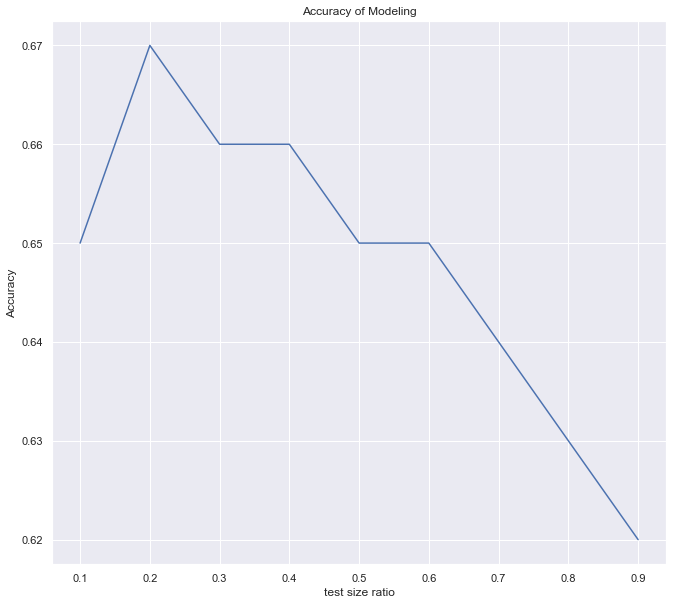

In [153]:
plt.plot(decesion["test size ratio"],decesion["accuracy"])
plt.title("Accuracy of Modeling")
plt.xlabel("test size ratio")
plt.ylabel("Accuracy")
plt.show()